# Title: Trending Videos Report 
### Author: Xia Cui 

### Introduction 

This report presents the analysis of the trending video data from 5 countries. 

### Table of content 
#### [Part 1: Data importing](#importing)  
#### [Part 2: EDA](#eda)  

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px 
#import cufflinks as cf
from plotly import graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot
init_notebook_mode(connected=True)
#cf.go_offline()
from matplotlib import pyplot as plt
from IPython.display import display
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.set_palette('colorblind')
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
#!pip install --upgrade plotly

### Part 1: Data importing

<a id="importing"></a>

In [2]:
videos = pd.read_csv('https://code.s3.yandex.net/datasets/trending_by_time.csv')

In [3]:
videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12343 entries, 0 to 12342
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   record_id       12343 non-null  int64 
 1   region          12343 non-null  object
 2   trending_date   12343 non-null  object
 3   category_title  12343 non-null  object
 4   videos_count    12343 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 482.3+ KB


In [4]:
videos['videos_count'].describe()

count    12343.000000
mean        27.545167
std         29.793491
min          2.000000
25%          8.000000
50%         18.000000
75%         36.000000
max        220.000000
Name: videos_count, dtype: float64

In [5]:
videos.duplicated().sum()

0

In [6]:
videos.isna().sum()

record_id         0
region            0
trending_date     0
category_title    0
videos_count      0
dtype: int64

In [7]:
#videos['trending_date'].unique()

In [8]:
videos['trending_date'] = pd.to_datetime(videos['trending_date'], 
                                         format = '%Y-%m-%d')
videos['trending_date'].value_counts()

2018-05-11    69
2018-06-03    69
2018-02-28    69
2018-02-16    68
2018-02-09    68
              ..
2018-02-03    51
2017-12-14    51
2018-02-04    50
2017-12-15    50
2017-12-24    49
Name: trending_date, Length: 205, dtype: int64

In [9]:
videos['category_title'] = videos['category_title'].astype('category')
videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12343 entries, 0 to 12342
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   record_id       12343 non-null  int64         
 1   region          12343 non-null  object        
 2   trending_date   12343 non-null  datetime64[ns]
 3   category_title  12343 non-null  category      
 4   videos_count    12343 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(2), object(1)
memory usage: 398.7+ KB


In [10]:
videos['region'] = videos['region'].astype('category')

### Part 2: EDA

<a id="eda"></a>

- Which video categories trended most often?
- How were they distributed among regions?
- What categories were especially popular in the United States? 
- Were there any differences between the categories popular in the US and those popular elsewhere?

In [11]:
videos.head()

,record_id,region,trending_date,category_title,videos_count
0,1,France,2017-11-14,Autos & Vehicles,8
1,2,France,2017-11-15,Autos & Vehicles,2
2,3,France,2017-11-16,Autos & Vehicles,6
3,4,France,2017-11-17,Autos & Vehicles,8
4,5,France,2017-11-18,Autos & Vehicles,4


In [12]:
videos['category_title'].nunique()

18

#### Daily trending videos by category 

In [13]:
#only choosing those with aggregated videos count over 10000
top_8 = videos.groupby('category_title').agg({'videos_count': 'sum'}).sort_values(by='videos_count',
                                                                          ascending=False).reset_index().head(8)

In [14]:
top_8_categories = top_8['category_title'].tolist()

In [15]:
#creating new column to only keep the names of the top 8 categories
videos['top_8'] = np.where(videos['category_title'].isin(top_8_categories), 
                           videos['category_title'], 'Others')

In [16]:
videos['top_8'].value_counts()

Others              4834
Entertainment        942
People & Blogs       942
Comedy               940
News & Politics      939
Music                938
Film & Animation     938
Howto & Style        937
Sports               933
Name: top_8, dtype: int64

In [17]:
videos.head()

,record_id,region,trending_date,category_title,videos_count,top_8
0,1,France,2017-11-14,Autos & Vehicles,8,Others
1,2,France,2017-11-15,Autos & Vehicles,2,Others
2,3,France,2017-11-16,Autos & Vehicles,6,Others
3,4,France,2017-11-17,Autos & Vehicles,8,Others
4,5,France,2017-11-18,Autos & Vehicles,4,Others


In [18]:
trending_rank = videos.groupby('top_8').agg({'videos_count': 'sum'}).sort_values(by='videos_count', 
                                                                ascending=False).reset_index()

In [20]:
fig=px.bar(x=trending_rank['top_8'], 
           y=trending_rank['videos_count'],
           title = 'Trending videos of all times by category',
           labels = ({'x':'Video category', 'y':'Total video count'}),
           height =600,
           width=800)
fig.update_xaxes(tickangle=-45)
fig.update_layout(title_x=0.5)

In [21]:
trending_category_date = videos.groupby(['top_8', 'trending_date']).agg(
    {'videos_count': 'sum'}).sort_values(by='videos_count',
                                            ascending=False).reset_index()

In [22]:
trending_category_date.isna().sum()

top_8            0
trending_date    0
videos_count     0
dtype: int64

In [23]:
trending_category_date = trending_category_date.replace(np.nan, 0)

In [24]:
trending_category_date.head()

,top_8,trending_date,videos_count
0,Entertainment,2018-05-23,642
1,Entertainment,2018-05-18,606
2,Entertainment,2018-05-22,602
3,Entertainment,2018-05-25,598
4,Entertainment,2018-05-31,596


In [25]:
trending_date = trending_category_date.groupby('trending_date').agg(
    {'videos_count': 'sum'}).reset_index()
trending_date.head()

,trending_date,videos_count
0,2017-11-14,1500
1,2017-11-15,1510
2,2017-11-16,1512
3,2017-11-17,1528
4,2017-11-18,1508


In [26]:
trending_category_date = trending_category_date.merge(
    trending_date, on='trending_date', how = 'left')
trending_category_date.head(20)

,top_8,trending_date,videos_count_x,videos_count_y
0,Entertainment,2018-05-23,642,1858
1,Entertainment,2018-05-18,606,1842
2,Entertainment,2018-05-22,602,1822
3,Entertainment,2018-05-25,598,1830
4,Entertainment,2018-05-31,596,1870
5,Entertainment,2018-06-06,594,1756
6,Entertainment,2018-06-03,592,1802
7,Entertainment,2018-06-07,590,1782
8,Entertainment,2018-06-09,588,1850
9,Entertainment,2018-05-26,582,1794


In [27]:
trending_category_date.columns= ['category', 
                                'trending_date', 
                                'videos_count',
                                'videos_count_total']
trending_category_date.head()

,category,trending_date,videos_count,videos_count_total
0,Entertainment,2018-05-23,642,1858
1,Entertainment,2018-05-18,606,1842
2,Entertainment,2018-05-22,602,1822
3,Entertainment,2018-05-25,598,1830
4,Entertainment,2018-05-31,596,1870


In [28]:
#trending_category_date = trending_category_date.sort_values(by='trending_date',
                                                           #ascending=True)

In [29]:
#trending_category_date['trending_date'].unique()

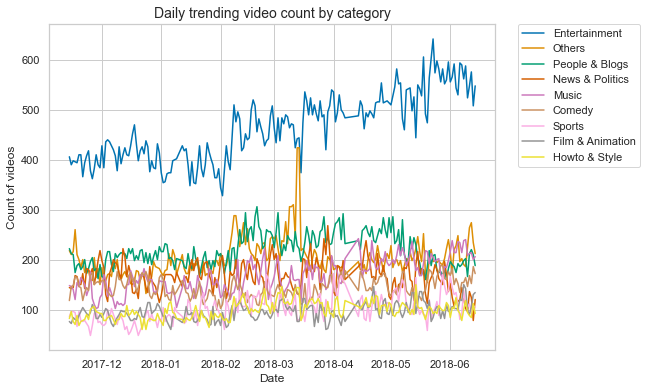

In [30]:
sns.set_style('whitegrid')
sns.set_context('notebook')
plt.figure(figsize=(8, 6))
sns.lineplot(
    x='trending_date',
    y='videos_count',
    data = trending_category_date,
    hue='category'
          )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Daily trending video count by category', size=14)
plt.xlabel('Date')
plt.ylabel('Count of videos')
plt.show()

In [42]:
fig = px.area(trending_category_date, 
              x="trending_date", 
              y="videos_count", 
              color="category",
              title = 'Daily trending video count by category',
              width = 800,
              height=600,
              labels = {'videos_count': 'Count of videos', 
                       'trending_date': 'Date',
                       'category': 'Video category'}
             )
fig.update_layout(
    title_x=0.5,
    font_color="dark blue",
    title_font_family="Times New Roman",
    title_font_color="black",
    title_font_size=26)
fig.show()

#### Trending videos by countries: the daily count 

In [43]:
trending_region = videos.groupby(['trending_date', 'region']).agg({
    'videos_count': 'sum'}).reset_index()
trending_region = trending_region.replace(np.nan, 0)

In [44]:
#dir(px.colors.qualitative)

In [46]:
fig = px.line(trending_region, 
              x="trending_date", 
              y="videos_count", 
              color='region',
              title = 'Daily videos count by region',
              width = 800,
              height=600,
              labels = {'videos_count': 'Count of videos', 
                       'trending_date': 'Date'},
              color_discrete_sequence=px.colors.qualitative.Vivid)
fig.update_layout(
    title_x=0.5,
    font_color="dark blue",
    title_font_family="Times New Roman",
    title_font_color="black",
    title_font_size=26)
fig.show()

#### Trending videos by countries: the proportion

In [47]:
trending_region = videos.groupby('region').agg(
    {'videos_count': 'sum'}).sort_values(by='videos_count',
                                            ascending=False).reset_index()

In [48]:
labels = trending_region['region'].tolist()
values = trending_region['videos_count'].tolist()

fig = go.Figure(go.Pie(labels=labels, values=values))
fig.update_layout(
    title_text='Trending videos by country',
    title_x=0.45,
    font_family="Courier New",
    font_color="dark blue",
    title_font_family="Times New Roman",
    title_font_color="black",
    title_font_size=26)
fig.show() 

#### Trending videos by countries: the differences 

In [49]:
trending_us = videos.query('region == "United States"').groupby(
    ['category_title']).agg(
    {'videos_count': 'sum'}).sort_values(by='videos_count',
                                         ascending=False).reset_index().head(5)
trending_us['region'] = 'United States'

In [50]:
trending_france = videos.query('region == "France"').groupby(
    'category_title').agg(
    {'videos_count': 'sum'}).sort_values(by='videos_count',
                                         ascending = False).reset_index().head()
trending_france['region'] = 'France'

In [51]:
trending_russia = videos.query('region == "Russia"').groupby(
    'category_title').agg(
    {'videos_count': 'sum'}).sort_values(by='videos_count',
                                         ascending = False).reset_index().head()
trending_russia['region'] = 'Russia'

In [52]:
trending_india= videos.query('region == "India"').groupby(
    'category_title').agg(
    {'videos_count': 'sum'}).sort_values(by='videos_count',
                                         ascending = False).reset_index().head()
trending_india['region'] = 'India'

In [53]:
trending_japan = videos.query('region == "Japan"').groupby(
    'category_title').agg(
    {'videos_count': 'sum'}).sort_values(by='videos_count',
                                         ascending = False).reset_index().head()
trending_japan['region'] = 'Japan'
trending_japan

,category_title,videos_count,region
0,Entertainment,11734,Japan
1,People & Blogs,5792,Japan
2,Sports,3606,Japan
3,News & Politics,2654,Japan
4,Music,2480,Japan


In [54]:
trending_all = trending_us.append(trending_france,
                                  ignore_index=True).append(trending_india,
                                                            ignore_index=True).append(trending_japan,
                                                                                      ignore_index=True).append(trending_russia,
                                                                                                                ignore_index=True)
trending_all

,category_title,videos_count,region
0,Entertainment,19638,United States
1,Music,12874,United States
2,Howto & Style,8280,United States
3,Comedy,6870,United States
4,People & Blogs,6122,United States
5,Entertainment,19020,France
6,People & Blogs,9346,France
7,Comedy,8446,France
8,Sports,8002,France
9,Music,7658,France


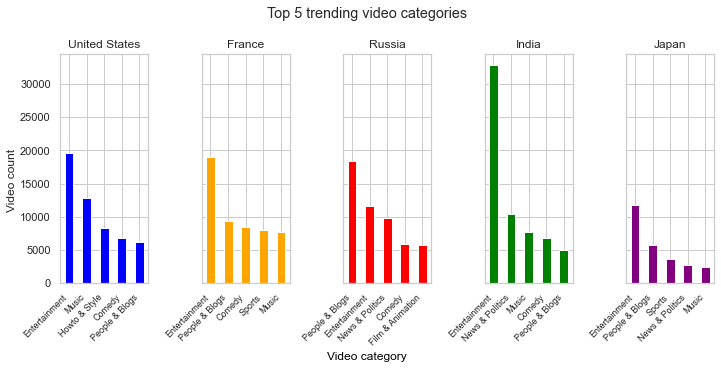

In [56]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize=(10,5), sharey = True)
trending_us.plot(kind = 'bar', x='category_title', grid = True, ax = ax1, color ='blue')
ax1.set_title('United States')
ax1.set_xlabel('')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, size=9, ha='right')
ax1.legend().set_visible(False)

trending_france.plot(kind = 'bar', x='category_title', grid = True, ax = ax2, color='orange')
ax2.set_title('France')
ax2.set_xlabel('')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 45, size=9, ha='right')
ax2.legend().set_visible(False)

trending_russia.plot(kind = 'bar', x='category_title', grid = True, ax = ax3, color ='red')
ax3.set_title('Russia')
ax3.set_xlabel('')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation = 45, size=9, ha='right')
ax3.legend().set_visible(False)

trending_india.plot(kind = 'bar', x='category_title', grid = True, ax = ax4, color ='green')
ax4.set_title('India')
ax4.set_xlabel('')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation = 45, size=9, ha='right')
ax4.legend().set_visible(False)

trending_japan.plot(kind = 'bar', x='category_title', grid = True, ax = ax5, color ='purple')
ax5.set_title('Japan')
ax5.set_xlabel('')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation = 45, size=9, ha='right')
ax5.legend().set_visible(False)

plt.suptitle('Top 5 trending video categories')
fig.text(0.5, 0.0001, 'Video category', ha='center', color = 'black')
fig.text(0.0001, 0.5, 'Video count', va='center', rotation='vertical')
plt.tight_layout()

### Part 2 summary 

In [268]:
import pathlib
pathlib.Path().absolute()

PosixPath('/Users/xiac/Documents/Yandex/video_ads')

In [269]:
#exporting to csv
videos.to_csv(r'/Users/xiac/Documents/Yandex/video_ads/videos.csv', index = False)